Omar A. Rodríguez Valencia

A01769948

# Actividad Regresión Lineal 2

Descarga la base de datos titulada "breast_cancer" disponible en canvas. Dicha base de datos contiene información sobre las características de diversos tumores.

Utiliza un modelo de regresión lineal múltiple para predecir el radio del tumor. Las variables regresoras de tu modelo deben de ser todas las variables de la base de datos.

Entrega un documento en formato PDF donde se observe la siguiente información.

1. Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

2. Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

3. Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba.

Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

4. Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

5. Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

6. Comparación entre datos reales y predicción. Análisis de los resultados.

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import t 
import scipy.stats as stats

In [380]:
df = pd.read_csv("breast_cancer.csv")

Después de leer los datos, lo primero que se tiene que hacer es checar que no haya valores nulos o NaN.

In [381]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [382]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No hubo valores faltantes en la base de datos, por lo que no es necesario imputar los datos.

Ahora, se checan qué tipos de datos hay presentes en el dataframe.

In [383]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Hay sólo un tipo de dato categórico, el cual es "diagnosis", hay que comprobar la cantidad de categorías que esa variable puede tomar.

In [384]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Sólo hay dos valores posibles, por lo que se convierten en dummies, pero se coloca sólo una columna dentro del modelo.

In [385]:
dummies = pd.get_dummies(df["diagnosis"], prefix="Diag")
dummies = dummies.drop(columns=["Diag_M"])

In [386]:
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=["diagnosis"])

Se comprueba que no haya correlaciones muy altas en el modelo, esto porque si dentro de la matriz hay una correlación alta, no se puede obtener la inversa, la cual es una operación importante para una regresión lineal.

In [387]:
corre = df.corr()

In [388]:
alta_corre = np.where((corre > 0.95) & (corre < 1))
alta_corre

(array([ 1,  1,  1,  1,  3,  3,  3,  3,  4,  4,  4,  4,  4, 11, 11, 13, 14,
        21, 21, 21, 21, 21, 23, 23, 23, 23, 23, 24, 24, 24]),
 array([ 3,  4, 21, 23,  1,  4, 21, 23,  1,  3, 21, 23, 24, 13, 14, 11, 11,
         1,  3,  4, 23, 24,  1,  3,  4, 21, 24,  4, 21, 23]))

In [389]:
baja_corr = np.where((corre > -1) & (corre < -0.95))
baja_corr

(array([], dtype=int64), array([], dtype=int64))

Como sí hay valores de correlación altos, los datos se deben estandarizar.

Para estandarizar los datos, se aplica esta fórmula a cada uno de los datos de la matriz:

$$Z=\frac{X-\mu}{\sigma}$$

Donde:

X=Muestra.

$\mu$=Media de la muestra.

$\sigma$=Desviación estándar de la muestra.

In [390]:
scaler = StandardScaler()
df_estandar = scaler.fit_transform(df)
df_estandar = pd.DataFrame(df_estandar, columns=df.columns)

Dentro del dataframe hay valores con nombres que no pueden ser acceptados, por lo que se deben eliminar los caracteres no aceptados.

In [391]:
df_estandar = df_estandar.rename(columns={
    "concave points_se": "concave_points_se",
    "concave points_worst": "concave_points_worst",
    "concave points_mean": "concave_points_mean"
    })

In [392]:
train, test = train_test_split(df_estandar, test_size=0.2, random_state=42)

In [393]:
model = smf.ols(formula="radius_mean~id+texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)

In [394]:
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.587e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:16   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2426.
Df Residuals:                     423   BIC:                            -2295.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

La prueba T es una prueba que se realiza para poder saber si los coeficientes son significativos para el modelo y por lo tanto deberían quedarse en el ajuste o deberían eliminarse para evitar que el modelo sea demasiado complicado.

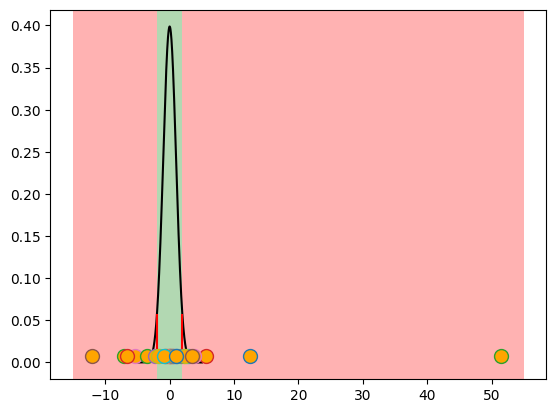

In [395]:
indice_columna = 0
dof = df_estandar.shape[0] - 1
alpha = 0.05
ntails = 2

tcrit = abs(stats.t.ppf(alpha/ntails, dof))

xs = np.linspace(-5,5,1000)

plt.plot(xs, stats.t.pdf(xs,dof), 'k')
plt.vlines([-tcrit, tcrit], 0.0, stats.t.pdf(tcrit,dof), colors='r')

for i in range(1, len(df_estandar.columns)):
    t = model.tvalues[i]
    plt.plot(t, 0.008, marker="o", markersize=10, markerfacecolor="orange")

plt.axvspan(-tcrit, tcrit, facecolor='green', alpha=0.3, label = 'Aceptación')
plt.axvspan(-15, -tcrit, facecolor='red', alpha=0.3, label = 'Rechazo')
plt.axvspan(tcrit, 55, facecolor='red', alpha=0.3)
plt.show()

Como se puede ver, hay varios valores que están dentro de la zona de rechazo, por lo que se puede asumir que dentro del dataframe hay muchas variables que no son significativas dentro del modelo, por lo que deberán ser eliminadas para que el modelo no sea excesivamente complejo y, por lo tanto, no acabe sobreajustado.

In [396]:
fTest = np.identity(len(model.params))
fTest = fTest[1:,:]
model.f_test(fTest)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=55869.535597468726, p=0.0, df_denom=423, df_num=31>

Valor critico 1.4861716526654176


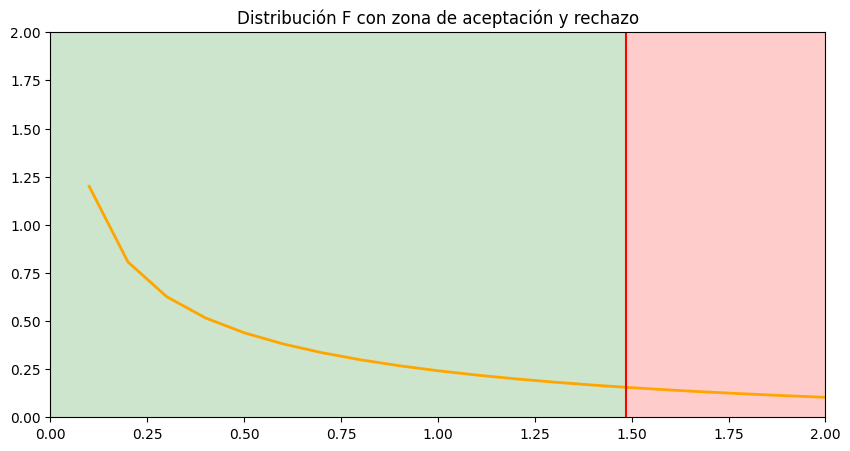

In [397]:
rand_f_samples = stats.f.rvs(dfn=30, dfd=424, size=100000)

plt.figure(figsize=(10, 5))

plt.plot(
    np.arange(0, 4, 0.1),
    stats.f.pdf(np.arange(0, 4, 0.1), dfn=1, dfd=453),
    "-",
    linewidth=2,
    color="orange",
)

plt.xlim(0, 2)
plt.ylim(0, 2)

plt.title("Distribución F con zona de aceptación y rechazo")

critical_value = stats.f.ppf(q=1-.05, dfn=30, dfd=424)
print('Valor critico', critical_value)

plt.vlines([-critical_value, critical_value],0,4, colors='r', label = 'valores criticos')
plt.axvspan(-critical_value, critical_value, facecolor='green', alpha=0.2)
plt.axvspan(critical_value, 10, facecolor='red', alpha=0.2)


plt.show()

La prueba F es un método para evaluar y poder deducir si la Hipótesis Nula se acepta o se rechaza.

Como se puede ver, la zona de rechazo va más allá de 1.5 y el valor que la prueba F nos arrojó fue de más de 5000, por lo que la hipótesis nula se rechaza y, por lo tanto, se comprueba que el modelo sí es significativo.

## Modelo de regresión hacia atrás

A partir de este momento, se comenzarán a eliminar los coeficientes que muestren un p-valor elevado (mayor a 0.05). Esto debido a que si el p-valor es muy elevado, se acepta la hipótesis nula:

$$H_0:\beta=0$$

Esto significa que el coeficiente es igual a 0, por lo que no es significativo para el modelo y, por lo tanto, se eliminará del modelo.

Si bien en el resumen del modelo puede haber muchas variables que muestren un p-valor elevado, el método indica que eliminemos sólo el más alto, para después volver a ajustar el modelo y repetir el proceso hasta que no queden coeficientes no significativos dentro del modelo.

In [398]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.587e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:16   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2426.
Df Residuals:                     423   BIC:                            -2295.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

En este primer resumen del modelo se puede ver que el valor de *ID* es el más alto, por lo tanto, se eliminará de la siguiente fórmula y se volverá a ajustar el modelo.

A partir de este momento, sólo se mencionarán de forma rápida las variables que se eliminarán sin explicar muy a detalle el procedimiento, debido a que la selección se llevará a cabo de la misma forma.

In [399]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.787e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:16   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2428.
Df Residuals:                     424   BIC:                            -2301.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Se elimina texture_se

In [400]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.000e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:17   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2430.
Df Residuals:                     425   BIC:                            -2307.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Se elimina texture worst

In [401]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.229e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:17   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2432.
Df Residuals:                     426   BIC:                            -2313.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Se elimina concavity worst

In [402]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.474e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:17   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2434.
Df Residuals:                     427   BIC:                            -2319.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Se elimina concave_points_mean

In [403]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.736e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:17   Log-Likelihood:                 1245.1
No. Observations:                 455   AIC:                            -2436.
Df Residuals:                     428   BIC:                            -2325.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Se elimina concave_points_worst

In [404]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.020e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:17   Log-Likelihood:                 1245.0
No. Observations:                 455   AIC:                            -2438.
Df Residuals:                     429   BIC:                            -2331.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [405]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.321e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:17   Log-Likelihood:                 1244.8
No. Observations:                 455   AIC:                            -2440.
Df Residuals:                     430   BIC:                            -2337.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Se elimina smoothnes_se

In [406]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.648e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:17   Log-Likelihood:                 1244.5
No. Observations:                 455   AIC:                            -2441.
Df Residuals:                     431   BIC:                            -2342.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Se elimina compactness_se

In [407]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.006e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:17   Log-Likelihood:                 1244.3
No. Observations:                 455   AIC:                            -2443.
Df Residuals:                     432   BIC:                            -2348.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Se elimina fractal_dimension_worst

In [408]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+Diag_B", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.395e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:18   Log-Likelihood:                 1244.0
No. Observations:                 455   AIC:                            -2444.
Df Residuals:                     433   BIC:                            -2353.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

Se elimina Diag_B

In [409]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.815e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:18   Log-Likelihood:                 1243.4
No. Observations:                 455   AIC:                            -2445.
Df Residuals:                     434   BIC:                            -2358.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

Se elimina radius_se

In [410]:
model = smf.ols(formula="radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.241e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:18   Log-Likelihood:                 1242.0
No. Observations:                 455   AIC:                            -2444.
Df Residuals:                     435   BIC:                            -2362.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

Se elimina texture_mean

In [411]:
model = smf.ols(formula="radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst", data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.709e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:18   Log-Likelihood:                 1240.4
No. Observations:                 455   AIC:                            -2443.
Df Residuals:                     436   BIC:                            -2364.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

Como se puede ver, no hay ninguna variable cuyo p-valor sea mayor a 0.05, por lo tanto, se puede asegurar que el modelo obtenido usa la cantidad óptima de variables independientes. 

Debido a que ya se ha obtenido el mejor modelo lineal posible, se deben llevar a cabo las prediciones y compararlas con los valores reales para evaluar si el modelo se ajusta correctamente a los datos y es apropiado usarlo para predicciones.

In [412]:
y_pred = model.predict(test)
y_test = test["radius_mean"]

In [413]:
print("MAE = ", mean_absolute_error(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))
print("R^2 = ", r2_score(y_test, y_pred))

MAE =  0.012744441745427685
MSE =  0.00039408040142804016
R^2 =  0.9995957840501069


Las métricas usadas para medir la calidad del modelo son las siguientes:

$$Error Absoluto Medio = \frac{1}{n}\sum{|y_i-\hat{y}_i|}$$

$$Error Cuadrático Medio = \frac{1}{n}\sum{(y_i-\hat{y}_i)^2}$$

$$R^2 = \frac{\sum{(y_i-\hat{y}_i)^2}}{\sum{(y_i-\hat{y}_i)^2}}$$

Donde:

$y$ = Valor real.

$\hat{y}$ = Valor predicho.

$n$ = Cantidad de datos.

El valor de $R^2$ es al que se le suele poner más atención, esto debido a que es un poco más descriptivo que los demás, pues su valor va de 0 a 1, por lo que es muy fácil verlo y notar qué tan cercano es a 1 para poder definir si el modelo es confiable o no.

Como se puede observar, el valor de $R^2$ es muy cercano a 1, además de que tanto el error absoluto como el error cuadrático son extremadamente bajos, por lo que es seguro asumir que el modelo es lo suficientemente confiable para su uso verdadero. Esto incluso tomando en cuenta que son datos médicos y, por lo tanto, exigen de una precisión más alta que otro tipo de datos.

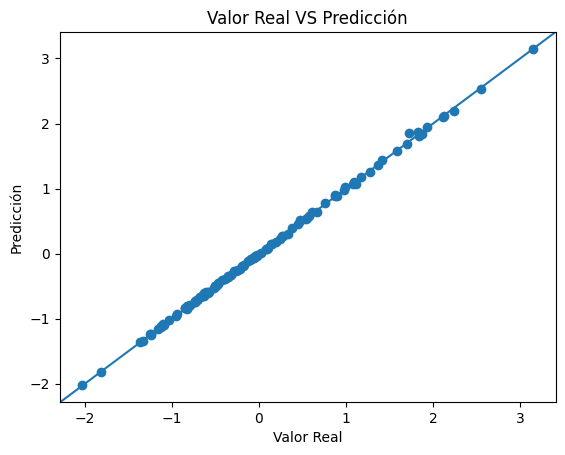

In [414]:
plt.scatter(y_test, y_pred)
plt.title("Valor Real VS Predicción")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.axline([0, 0], [1, 1])
plt.show()

Para complementar los valores numéricos, es posible observar de forma gráfica qué tan exacto es el modelo, para esto se grafican los valores reales VS valores predichos y, si los puntos de la gráfica de dispersión se ajustan a una recta de 45°, entonces el modelo es correcto.

## Conclusión

Para terminar con esta actividad, es necesario hacer notar que los valores obtenidos parecen tener sentido de acuerdo a cierta lógica, pues la variable *Id* fue una de las primeras que se eliminaron del modelo por su baja correlación, siendo que esta variable efectivamente no podría tener ningún tipo de relación con los datos reales que se desean predecir.

Un aprendizaje que se puede obtener de esta actividad es que es falsa la creencia de que *entre más datos, el modelo será mejor*, pues también es necesario conocer qué tan útiles son los datos que se están usando. En este caso, si las variables no se hubieran eliminado, el modelo habría sido más complejo sin obtener ninguna recompensa y, de hecho, haberlo dejado pudo haber ocasionado que el modelo se sobreajustara y, por lo tanto, perdiera rendimiento. Es por eso que antes de tan siquiera pensar en crear un modelo, se debe tomar en cuenta la información con la que se cuenta para saber si de verdad esos datos tienen relación con la variable dependiente.